In [1]:
pip install seaborn 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pds
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from __future__ import division
import random
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from scipy import stats
#import graphviz
from sklearn.model_selection import train_test_split


from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

%matplotlib inline

# Visualisation des données 

In [3]:
df = pds.read_csv('/home/mvernier/Documents/2023-2024/info6/presentation/titanic/train.csv', sep=",") # load a pandas dataframe from csv in current directory
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Après cette magnifique visualisation du jeux de données, on décide de supprimer PasengerId et Name 

# Suppression des données 

on modifie ensuite les données pour n'avoir que des données chiffrées 

In [9]:
sex=[]
for pasenger in df['Sex'] : 
    if (pasenger=='male'):
        sex.append(0)
    else : 
        sex.append(1)
df['Sex']=sex

In [10]:
cabins=[]

for element in df['Cabin']:
    if type(element)==str:
        letter=element[:1]
        if letter=="A":
            cabins.append(1)
        elif letter=="B":
            cabins.append(2)
        elif letter=="C":
            cabins.append(3)
        elif letter=="D":
            cabins.append(4)
        elif letter=="E":
            cabins.append(5)
        elif letter=='F':
            cabins.append(6)
        elif letter=='T':
            cabins.append(7)
        else :
            cabins.append(8)
    else:
        cabins.append(float('nan'))
            
df["Cabin"]=cabins


In [11]:
donnee=df.drop(['PassengerId'], axis=1)
donnee=donnee.drop(['Name'], axis=1)
donnee=donnee.drop(['Cabin'], axis=1)

In [12]:
donnee=donnee.drop(['Ticket'], axis=1)

In [13]:
donnee.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


## On tente de discrétiser la classe age 

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

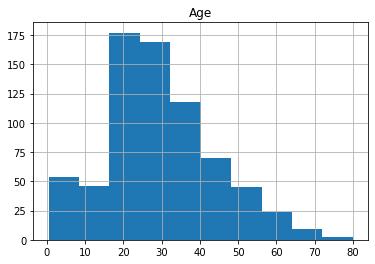

In [14]:
donnee.hist('Age')

In [15]:
donnee['Age'].isnull().sum()

177

On a 177 valeurs manquantes dans Age, on décide donc de supprimer ces passagers

In [16]:
tab=donnee.dropna()

In [17]:
tab['Age'].isnull().sum()

0

In [18]:
age=[]
for x in tab['Age'] :
    if 0<x<18 : 
        age.append(0)
    elif 18<x<25 : 
        age.append(1)
    elif 25<x<40 : 
        age.append(2)
    else :
        age.append(3)
tab['Age']=age
tab.head()

/tmp/ipykernel_29837/588412388.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tab['Age']=age


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1,1,0,7.2500,S
1,1,1,1,2,1,0,71.2833,C
2,1,3,1,2,0,0,7.9250,S
3,1,1,1,2,1,0,53.1000,S
4,0,3,0,2,0,0,8.0500,S


In [19]:
tab=tab.drop(['Embarked'], axis=1)

# Random forest

In [20]:
survived=tab['Survived']
survie=[]
classes = tab.loc[:,"Survived"]
for x in classes : 
    if x==0 : 
        survie.append('mort')
    else : 
        survie.append('survie')
classes=survie

In [21]:
dff = tab.drop(['Survived'],axis=1) # on cherche à prédire qui survie 

In [22]:
X_train, X_test, y_train, y_test = train_test_split(dff,classes , test_size=0.33, random_state=10)

In [23]:
type(X_train)

pandas.core.frame.DataFrame

In [24]:
model = ensemble.RandomForestClassifier(n_estimators=50, criterion = 'entropy', random_state=10,
                                        min_samples_leaf=3,bootstrap=True)

In [25]:
model.fit(X_train, y_train)
sortedLabelList = sorted(list(set(classes)))
print(sortedLabelList)
y_predict_train = model.predict(X_train)
metrics.confusion_matrix(y_true=y_train, y_pred=y_predict_train, labels=sortedLabelList)

['mort', 'survie']


array([[275,  13],
       [ 49, 140]])

In [26]:
y_predict = model.predict(X_test)
print(y_predict[0:5])
print(metrics.accuracy_score(y_test, y_predict))

['mort' 'mort' 'mort' 'mort' 'survie']
0.8382978723404255


In [27]:
print(X_test.head())
type(X_test)

     Pclass  Sex  Age  SibSp  Parch      Fare
104       3    0    2      2      0    7.9250
460       1    0    3      0      0   26.5500
471       3    0    2      0      0    8.6625
683       3    0    0      5      2   46.9000
380       1    1    3      0      0  227.5250


pandas.core.frame.DataFrame

In [29]:
x=pds.DataFrame({ "Pclass": [2],"Sex":[0],"Age":[1,2,3],"SibSp": [0,0,0],"Parch":[0,0,0],"Fare":[150,200,300]})
y=model.predict(x)
print(y)

ValueError: All arrays must be of the same length

In [30]:
sortedLabelList = sorted(list(set(classes)))
metrics.confusion_matrix(y_true=y_test, y_pred=y_predict, labels=sortedLabelList)

array([[133,   3],
       [ 35,  64]])

In [31]:
sortedLabelList

['mort', 'survie']

In [32]:
pds.DataFrame(
    metrics.confusion_matrix(y_true=y_test, y_pred=y_predict, labels=sortedLabelList),
    columns=['Predicted ' + str(className) for className in sortedLabelList],
    index=['True ' + str(className) for className in sortedLabelList]
)

,Predicted mort,Predicted survie
True mort,133,3
True survie,35,64


In [33]:
print(metrics.classification_report(y_test, y_predict))  

              precision    recall  f1-score   support

        mort       0.79      0.98      0.88       136
      survie       0.96      0.65      0.77        99

    accuracy                           0.84       235
   macro avg       0.87      0.81      0.82       235
weighted avg       0.86      0.84      0.83       235



In [34]:
pds.DataFrame(model.predict_proba(X_test),
    columns=['Predicted ' + className for className in sortedLabelList]).head(10)

,Predicted mort,Predicted survie
0,0.795273,0.204727
1,0.602391,0.397609
2,0.740600,0.259400
3,0.876434,0.123566
4,0.044524,0.955476
5,0.589897,0.410103
6,0.018607,0.981393
7,0.901307,0.098693
8,0.841294,0.158706
9,0.676155,0.323845


## Cross validation 

In [35]:
model2 = tree.DecisionTreeClassifier(criterion = 'entropy', random_state=10, min_samples_leaf=3)

In [36]:
scoring = ['accuracy', 'precision_macro', 'precision_weighted', 'recall_macro', 'recall_weighted', 'f1_macro', 'f1_weighted']
#cv = KFold(n_splits=5, random_state=10, shuffle=True)
cv = StratifiedKFold(n_splits=5, random_state=10, shuffle=True)
scores = cross_validate(model, dff, classes, scoring=scoring,
                        cv=cv, return_train_score=False)
#scores = cross_validate(model, dff, classes, scoring=scoring,
#                        cv=5, return_train_score=False)
#cv = 5 folds made by StratifiedKFold (default) for sklearn classifiers (all classifiers of class ClassifierMixin)
scores.keys()

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision_macro', 'test_precision_weighted', 'test_recall_macro', 'test_recall_weighted', 'test_f1_macro', 'test_f1_weighted'])

In [37]:
print('Global accuracy over all folds: %0.6f (+/- %0.6f)'
      % (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2))
print('For each metric, list the score values on each fold:')
for metric in sorted(scores.keys()):
    print(str(['{:.6f}'.format(value) for value in scores[metric]]) + ' ' +metric)
    

Global accuracy over all folds: 0.808884 (+/- 0.098439)
For each metric, list the score values on each fold:
['0.073017', '0.057341', '0.056641', '0.056185', '0.055916'] fit_time
['0.012871', '0.012260', '0.012167', '0.012151', '0.012123'] score_time
['0.902098', '0.790210', '0.809859', '0.760563', '0.781690'] test_accuracy
['0.897270', '0.775157', '0.792566', '0.752258', '0.765789'] test_f1_macro
['0.901475', '0.786142', '0.804376', '0.761202', '0.776963'] test_f1_weighted
['0.903142', '0.790570', '0.818414', '0.751072', '0.783091'] test_precision_macro
['0.902337', '0.790363', '0.813978', '0.762145', '0.782332'] test_precision_weighted
['0.893002', '0.768763', '0.783385', '0.753767', '0.759442'] test_recall_macro
['0.902098', '0.790210', '0.809859', '0.760563', '0.781690'] test_recall_weighted


## KNN

<AxesSubplot:>

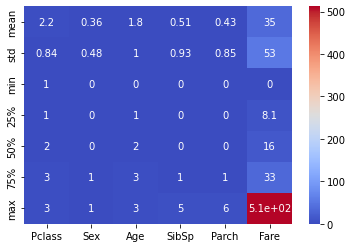

In [38]:
stats = dff.describe()
stats = stats.drop('count',axis=0)
sns.heatmap(stats,annot=True,cmap='coolwarm')

In [39]:
from sklearn.preprocessing import StandardScaler
zscore = StandardScaler().fit(dff)
X_z = pds.DataFrame(zscore.transform(dff), index=dff.index, columns=dff.columns)
X_z.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare
count,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02
mean,-1.397135e-16,3.742325e-17,-1.197544e-16,-1.496930e-17,1.496930e-17,-6.736185e-17
std,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00
min,-1.482983e+00,-7.561375e-01,-1.716674e+00,-5.527137e-01,-5.067874e-01,-6.534272e-01
25%,-1.482983e+00,-7.561375e-01,-7.542552e-01,-5.527137e-01,-5.067874e-01,-5.012575e-01
50%,-2.871914e-01,-7.561375e-01,2.081636e-01,-5.527137e-01,-5.067874e-01,-3.576726e-01
75%,9.085997e-01,1.322511e+00,1.170582e+00,5.225108e-01,6.647471e-01,-2.962586e-02
max,9.085997e-01,1.322511e+00,1.170582e+00,4.823409e+00,6.522419e+00,9.031168e+00


<AxesSubplot:>

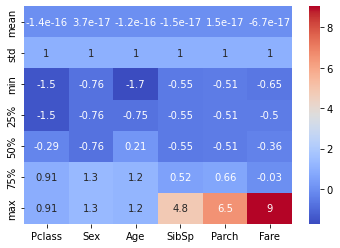

In [40]:
stats = X_z.describe()
stats = stats.drop('count',axis=0)
sns.heatmap(stats,annot=True,cmap='coolwarm')

In [41]:
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

scoring = ['accuracy',
           'precision_weighted',
           'recall_weighted',
           'f1_weighted']

knn = KNeighborsClassifier()
scores = cross_validate(knn, dff, classes, scoring=scoring,cv=cv, return_train_score=True)
scores = pds.DataFrame(scores).mean()

knn = KNeighborsClassifier()
scores_z = cross_validate(knn, X_z, classes, scoring=scoring,cv=cv, return_train_score=True)
scores_z = pds.DataFrame(scores_z).mean()

<AxesSubplot:>

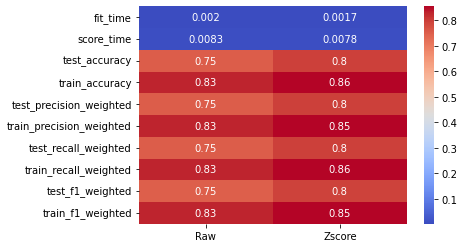

In [42]:
full_scores = pds.DataFrame({"Raw": scores, "Zscore":scores_z})
sns.heatmap(full_scores,annot=True,cmap='coolwarm')

In [44]:
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

n_neighbors = [1,3,5]
weights = ["uniform", "distance"]
distances = ["euclidean","manhattan"]

scoring = ['accuracy',
           'precision_weighted',
           'recall_weighted',
           'f1_weighted']

full_scores = {}
for k in n_neighbors:
    for d in distances:
        for w in weights:
            knn = KNeighborsClassifier(n_neighbors=k, weights=w, metric=d)
            scores = cross_validate(knn, X_z, classes, scoring=scoring,cv=cv, return_train_score=True)
            scores = pds.DataFrame(scores).mean()
            full_scores[str(k)+"-"+d+"-"+w] = scores

<AxesSubplot:>

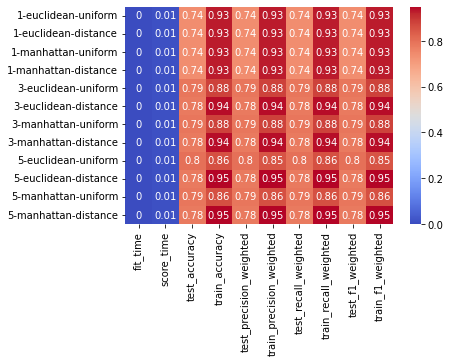

In [45]:
full_scores = pds.DataFrame(full_scores)
sns.heatmap(full_scores.T.round(2),annot=True,cmap='coolwarm')

In [46]:
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

knn = KNeighborsClassifier()
scores_knn = cross_validate(knn, X_z, classes, scoring=scoring,cv=cv, return_train_score=True)
scores_knn = pds.DataFrame(scores_knn).mean()

dt = DecisionTreeClassifier()
scores_dt = cross_validate(dt, X_z, classes, scoring=scoring,cv=cv, return_train_score=True)
scores_dt = pds.DataFrame(scores_dt).mean()

svm = SVC(kernel='linear')
scores_svm = cross_validate(svm, X_z, classes, scoring=scoring,cv=cv, return_train_score=True)
scores_svm = pds.DataFrame(scores_svm).mean()

<AxesSubplot:>

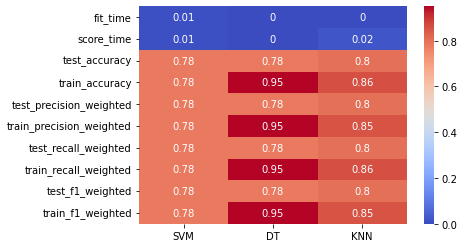

In [47]:
full_scores = pds.DataFrame({"SVM": scores_svm, "DT":scores_dt, "KNN":scores_knn})
sns.heatmap(full_scores.T.round(2).T,annot=True,cmap='coolwarm')

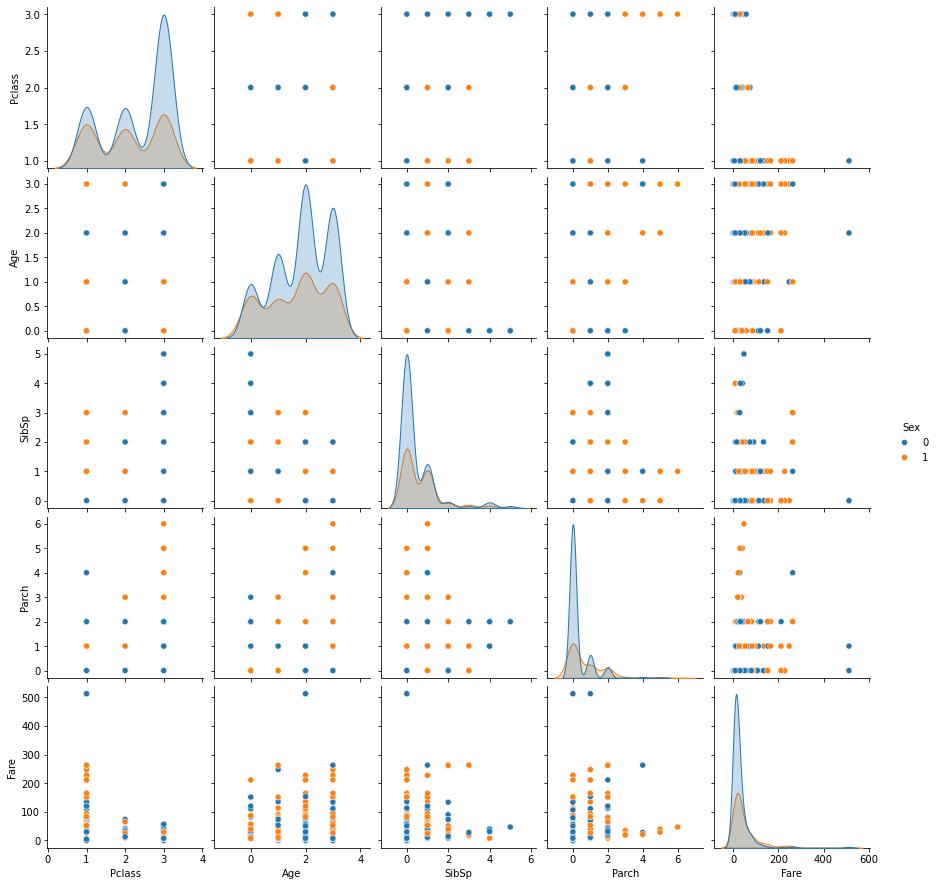

In [48]:
sns.pairplot(data=dff, hue="Sex")

<AxesSubplot:xlabel='Fare', ylabel='Sex'>

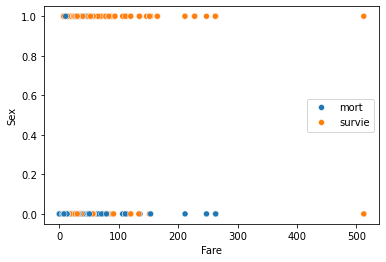

In [49]:
sns.scatterplot(data=dff, x="Fare", y="Sex", hue=classes)

# Gradient boosted tree for classification tasks

Le Gradient Boosting Tree est un autre algorithme de boosting dont l’objectif est d’entraîner une forêt d’arbre de manière séquentielle afin que chaque nouvel arbre compense les faiblesses de la forêt.

Cette fois l’algorithme se concentre sur les résidus des précédents arbres plutôt que sur les poids des exemples.

Les résidus sont la différence entre la prédiction d’un modèle et la valeur cible. Si l’on ajoute le résidus à la valeur prédite on atteint la valeur cible. 

L’idée ici est de prédire les résidus afin de les ajouter à la forêt pour avoir une prédiction plus précise de la variable cible.

Le premier estimateur de notre forêt ne sera pas un arbre mais une feuille qui aura pour valeur la moyenne de la variable cible. 

La forêt est pour le moment constituée d’un estimateur qui est la feuille. Les résidus seront donc la différence entre la prédiction de la forêt actuelle et la valeur cible. 

Nous allons entraîner un arbre capable de prédire les résidus d’un exemple en prenant en compte ses variables explicatives.

Une fois l’arbre entraîné il sera ajouté à la forêt. Le but n’est plus de faire la moyenne des estimateurs de notre forêt mais plutôt de compléter les estimateurs déjà présents. 

On va donc prendre la prédiction de la feuille et y ajouter la prédiction des résidus de notre premier arbre pondéré par un taux d’apprentissage ou learning rate. 

Chaque nouvel arbre de notre forêt aura pour objectif de diminuer le gap entre la prédiction actuelle de la forêt et la valeur cible. 

La prédiction d’une forêt sera l’addition de la prédiction de chacun des estimateurs. 

Par exemple, si une forêt contient 10 arbres, pour la prédiction on aura additionné à la prédiction de la feuille de départ aux résultats de chacun des arbres pondéré par le taux d’apprentissage pour avoir la prédiction finale. 

In [52]:
pip install plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [53]:
import pandas as pd # for data manipulation
import numpy as np # for data manipulation

from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn.ensemble import GradientBoostingClassifier

import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization

In [65]:
def model_training(X, y, n_trees):

    ##### Step 1 - Create training and testing samples
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


    ##### Step 2
    # Set model and its parameters
    model = GradientBoostingClassifier(loss='exponential', #deviance or explonential
                               criterion='squared_error', # {‘friedman_mse’, ‘squared_error’, ‘mse’, ‘mae’}, default=’friedman_mse’
                               learning_rate=0.1, # default 1.0
                               subsample=1.0, #default=1.0
                               random_state=0, # random state for reproducibility
                               max_features='sqrt', # number of random features to use sqrt(n_features)
                               min_samples_leaf=1000, # minimum no of observarions allowed in a leaf
                               max_depth=3, # maximum depth of the tree
                               n_estimators=n_trees # how many trees to build
                              )

    # Fit the model
    clf = model.fit(X_train, y_train)


    ##### Step 3
    # Predict class labels on training data
    pred_labels_tr = model.predict(X_train)
    # Predict class labels on a test data
    pred_labels_te = model.predict(X_test)


    ##### Step 4 - Model summary
    # Basic info about the model
    print('*************** Tree Summary ***************')
    print('No. of classes: ', clf.n_classes_)
    print('Classes: ', clf.classes_)
    print('No. of features: ', clf.n_features_in_)
    print('No. of Estimators: ', len(clf.estimators_))
    print('--------------------------------------------------------')
    print("")

    print('*************** Evaluation on Test Data ***************')
    score_te = model.score(X_test, y_test)
    print('Accuracy Score: ', score_te)
    # Look at classification report to evaluate the model
    print(classification_report(y_test, pred_labels_te))
    print('--------------------------------------------------------')
    print("")

    print('*************** Evaluation on Training Data ***************')
    score_tr = model.score(X_train, y_train)
    print('Accuracy Score: ', score_tr)
    # Look at classification report to evaluate the model
    print(classification_report(y_train, pred_labels_tr))
    print('--------------------------------------------------------')
    
    return clf, X_test, y_test
  
    
##### Step 5 - Select data and call the above function  
# Select data for modelling
X=dff[['Age', 'Sex', 'Pclass', 'Fare']]
y=classes

# Train the model and show the resuls
clf, X_test, y_test = model_training(X, y, n_trees=1000)

for n_trees in range(2, 501, 10): 
    clf, X_test, y_test = model_training(X, y, n_trees)







*************** Tree Summary ***************
No. of classes:  2
Classes:  ['mort' 'survie']
No. of features:  4
No. of Estimators:  1000
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.5734265734265734
              precision    recall  f1-score   support

        mort       0.57      1.00      0.73        82
      survie       0.00      0.00      0.00        61

    accuracy                           0.57       143
   macro avg       0.29      0.50      0.36       143
weighted avg       0.33      0.57      0.42       143

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.6010544815465729
              precision    recall  f1-score   support

        mort       0.60      1.00      0.75       342
      survie       0.00      0.00      0.00       227

    accuracy                           0.60       569
   macro avg  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

*************** Tree Summary ***************
No. of classes:  2
Classes:  ['mort' 'survie']
No. of features:  4
No. of Estimators:  52
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.5734265734265734
              precision    recall  f1-score   support

        mort       0.57      1.00      0.73        82
      survie       0.00      0.00      0.00        61

    accuracy                           0.57       143
   macro avg       0.29      0.50      0.36       143
weighted avg       0.33      0.57      0.42       143

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.6010544815465729
              precision    recall  f1-score   support

        mort       0.60      1.00      0.75       342
      survie       0.00      0.00      0.00       227

    accuracy                           0.60       569
   macro avg    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

*************** Tree Summary ***************
No. of classes:  2
Classes:  ['mort' 'survie']
No. of features:  4
No. of Estimators:  92
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.5734265734265734
              precision    recall  f1-score   support

        mort       0.57      1.00      0.73        82
      survie       0.00      0.00      0.00        61

    accuracy                           0.57       143
   macro avg       0.29      0.50      0.36       143
weighted avg       0.33      0.57      0.42       143

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.6010544815465729
              precision    recall  f1-score   support

        mort       0.60      1.00      0.75       342
      survie       0.00      0.00      0.00       227

    accuracy                           0.60       569
   macro avg    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

*************** Tree Summary ***************
No. of classes:  2
Classes:  ['mort' 'survie']
No. of features:  4
No. of Estimators:  122
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.5734265734265734
              precision    recall  f1-score   support

        mort       0.57      1.00      0.73        82
      survie       0.00      0.00      0.00        61

    accuracy                           0.57       143
   macro avg       0.29      0.50      0.36       143
weighted avg       0.33      0.57      0.42       143

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.6010544815465729
              precision    recall  f1-score   support

        mort       0.60      1.00      0.75       342
      survie       0.00      0.00      0.00       227

    accuracy                           0.60       569
   macro avg   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

*************** Tree Summary ***************
No. of classes:  2
Classes:  ['mort' 'survie']
No. of features:  4
No. of Estimators:  152
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.5734265734265734
              precision    recall  f1-score   support

        mort       0.57      1.00      0.73        82
      survie       0.00      0.00      0.00        61

    accuracy                           0.57       143
   macro avg       0.29      0.50      0.36       143
weighted avg       0.33      0.57      0.42       143

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.6010544815465729
              precision    recall  f1-score   support

        mort       0.60      1.00      0.75       342
      survie       0.00      0.00      0.00       227

    accuracy                           0.60       569
   macro avg   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Accuracy Score:  0.6010544815465729
              precision    recall  f1-score   support

        mort       0.60      1.00      0.75       342
      survie       0.00      0.00      0.00       227

    accuracy                           0.60       569
   macro avg       0.30      0.50      0.38       569
weighted avg       0.36      0.60      0.45       569

--------------------------------------------------------
*************** Tree Summary ***************
No. of classes:  2
Classes:  ['mort' 'survie']
No. of features:  4
No. of Estimators:  182
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.5734265734265734
              precision    recall  f1-score   support

        mort       0.57      1.00      0.73        82
      survie       0.00      0.00      0.00        61

    accuracy                           0.57       143
   macro avg       0.29      0.50      0.36       143
weighted avg       0.3

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

              precision    recall  f1-score   support

        mort       0.57      1.00      0.73        82
      survie       0.00      0.00      0.00        61

    accuracy                           0.57       143
   macro avg       0.29      0.50      0.36       143
weighted avg       0.33      0.57      0.42       143

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.6010544815465729
              precision    recall  f1-score   support

        mort       0.60      1.00      0.75       342
      survie       0.00      0.00      0.00       227

    accuracy                           0.60       569
   macro avg       0.30      0.50      0.38       569
weighted avg       0.36      0.60      0.45       569

--------------------------------------------------------
*************** Tree Summary ***************
No. of classes:  2
Classes:  ['mort' 'survie']
No. of features:  4
No. of Estimators:  202

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

*************** Tree Summary ***************
No. of classes:  2
Classes:  ['mort' 'survie']
No. of features:  4
No. of Estimators:  212
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.5734265734265734
              precision    recall  f1-score   support

        mort       0.57      1.00      0.73        82
      survie       0.00      0.00      0.00        61

    accuracy                           0.57       143
   macro avg       0.29      0.50      0.36       143
weighted avg       0.33      0.57      0.42       143

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.6010544815465729
              precision    recall  f1-score   support

        mort       0.60      1.00      0.75       342
      survie       0.00      0.00      0.00       227

    accuracy                           0.60       569
   macro avg   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

*************** Tree Summary ***************
No. of classes:  2
Classes:  ['mort' 'survie']
No. of features:  4
No. of Estimators:  232
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.5734265734265734
              precision    recall  f1-score   support

        mort       0.57      1.00      0.73        82
      survie       0.00      0.00      0.00        61

    accuracy                           0.57       143
   macro avg       0.29      0.50      0.36       143
weighted avg       0.33      0.57      0.42       143

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.6010544815465729
              precision    recall  f1-score   support

        mort       0.60      1.00      0.75       342
      survie       0.00      0.00      0.00       227

    accuracy                           0.60       569
   macro avg   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

*************** Tree Summary ***************
No. of classes:  2
Classes:  ['mort' 'survie']
No. of features:  4
No. of Estimators:  252
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.5734265734265734
              precision    recall  f1-score   support

        mort       0.57      1.00      0.73        82
      survie       0.00      0.00      0.00        61

    accuracy                           0.57       143
   macro avg       0.29      0.50      0.36       143
weighted avg       0.33      0.57      0.42       143

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.6010544815465729
              precision    recall  f1-score   support

        mort       0.60      1.00      0.75       342
      survie       0.00      0.00      0.00       227

    accuracy                           0.60       569
   macro avg   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

*************** Tree Summary ***************
No. of classes:  2
Classes:  ['mort' 'survie']
No. of features:  4
No. of Estimators:  272
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.5734265734265734
              precision    recall  f1-score   support

        mort       0.57      1.00      0.73        82
      survie       0.00      0.00      0.00        61

    accuracy                           0.57       143
   macro avg       0.29      0.50      0.36       143
weighted avg       0.33      0.57      0.42       143

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.6010544815465729
              precision    recall  f1-score   support

        mort       0.60      1.00      0.75       342
      survie       0.00      0.00      0.00       227

    accuracy                           0.60       569
   macro avg   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

*************** Tree Summary ***************
No. of classes:  2
Classes:  ['mort' 'survie']
No. of features:  4
No. of Estimators:  292
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.5734265734265734
              precision    recall  f1-score   support

        mort       0.57      1.00      0.73        82
      survie       0.00      0.00      0.00        61

    accuracy                           0.57       143
   macro avg       0.29      0.50      0.36       143
weighted avg       0.33      0.57      0.42       143

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.6010544815465729
              precision    recall  f1-score   support

        mort       0.60      1.00      0.75       342
      survie       0.00      0.00      0.00       227

    accuracy                           0.60       569
   macro avg   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

*************** Tree Summary ***************
No. of classes:  2
Classes:  ['mort' 'survie']
No. of features:  4
No. of Estimators:  312
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.5734265734265734
              precision    recall  f1-score   support

        mort       0.57      1.00      0.73        82
      survie       0.00      0.00      0.00        61

    accuracy                           0.57       143
   macro avg       0.29      0.50      0.36       143
weighted avg       0.33      0.57      0.42       143

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.6010544815465729
              precision    recall  f1-score   support

        mort       0.60      1.00      0.75       342
      survie       0.00      0.00      0.00       227

    accuracy                           0.60       569
   macro avg   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

*************** Tree Summary ***************
No. of classes:  2
Classes:  ['mort' 'survie']
No. of features:  4
No. of Estimators:  332
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.5734265734265734
              precision    recall  f1-score   support

        mort       0.57      1.00      0.73        82
      survie       0.00      0.00      0.00        61

    accuracy                           0.57       143
   macro avg       0.29      0.50      0.36       143
weighted avg       0.33      0.57      0.42       143

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.6010544815465729
              precision    recall  f1-score   support

        mort       0.60      1.00      0.75       342
      survie       0.00      0.00      0.00       227

    accuracy                           0.60       569
   macro avg   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

*************** Tree Summary ***************
No. of classes:  2
Classes:  ['mort' 'survie']
No. of features:  4
No. of Estimators:  352
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.5734265734265734
              precision    recall  f1-score   support

        mort       0.57      1.00      0.73        82
      survie       0.00      0.00      0.00        61

    accuracy                           0.57       143
   macro avg       0.29      0.50      0.36       143
weighted avg       0.33      0.57      0.42       143

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.6010544815465729
              precision    recall  f1-score   support

        mort       0.60      1.00      0.75       342
      survie       0.00      0.00      0.00       227

    accuracy                           0.60       569
   macro avg   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

              precision    recall  f1-score   support

        mort       0.60      1.00      0.75       342
      survie       0.00      0.00      0.00       227

    accuracy                           0.60       569
   macro avg       0.30      0.50      0.38       569
weighted avg       0.36      0.60      0.45       569

--------------------------------------------------------
*************** Tree Summary ***************
No. of classes:  2
Classes:  ['mort' 'survie']
No. of features:  4
No. of Estimators:  372
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.5734265734265734
              precision    recall  f1-score   support

        mort       0.57      1.00      0.73        82
      survie       0.00      0.00      0.00        61

    accuracy                           0.57       143
   macro avg       0.29      0.50      0.36       143
weighted avg       0.33      0.57      0.42       143

---

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

*************** Tree Summary ***************
No. of classes:  2
Classes:  ['mort' 'survie']
No. of features:  4
No. of Estimators:  382
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.5734265734265734
              precision    recall  f1-score   support

        mort       0.57      1.00      0.73        82
      survie       0.00      0.00      0.00        61

    accuracy                           0.57       143
   macro avg       0.29      0.50      0.36       143
weighted avg       0.33      0.57      0.42       143

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.6010544815465729
              precision    recall  f1-score   support

        mort       0.60      1.00      0.75       342
      survie       0.00      0.00      0.00       227

    accuracy                           0.60       569
   macro avg   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

              precision    recall  f1-score   support

        mort       0.57      1.00      0.73        82
      survie       0.00      0.00      0.00        61

    accuracy                           0.57       143
   macro avg       0.29      0.50      0.36       143
weighted avg       0.33      0.57      0.42       143

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.6010544815465729
              precision    recall  f1-score   support

        mort       0.60      1.00      0.75       342
      survie       0.00      0.00      0.00       227

    accuracy                           0.60       569
   macro avg       0.30      0.50      0.38       569
weighted avg       0.36      0.60      0.45       569

--------------------------------------------------------
*************** Tree Summary ***************
No. of classes:  2
Classes:  ['mort' 'survie']
No. of features:  4
No. of Estimators:  402

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

              precision    recall  f1-score   support

        mort       0.57      1.00      0.73        82
      survie       0.00      0.00      0.00        61

    accuracy                           0.57       143
   macro avg       0.29      0.50      0.36       143
weighted avg       0.33      0.57      0.42       143

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.6010544815465729
              precision    recall  f1-score   support

        mort       0.60      1.00      0.75       342
      survie       0.00      0.00      0.00       227

    accuracy                           0.60       569
   macro avg       0.30      0.50      0.38       569
weighted avg       0.36      0.60      0.45       569

--------------------------------------------------------
*************** Tree Summary ***************
No. of classes:  2
Classes:  ['mort' 'survie']
No. of features:  4
No. of Estimators:  412

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

              precision    recall  f1-score   support

        mort       0.57      1.00      0.73        82
      survie       0.00      0.00      0.00        61

    accuracy                           0.57       143
   macro avg       0.29      0.50      0.36       143
weighted avg       0.33      0.57      0.42       143

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.6010544815465729
              precision    recall  f1-score   support

        mort       0.60      1.00      0.75       342
      survie       0.00      0.00      0.00       227

    accuracy                           0.60       569
   macro avg       0.30      0.50      0.38       569
weighted avg       0.36      0.60      0.45       569

--------------------------------------------------------
*************** Tree Summary ***************
No. of classes:  2
Classes:  ['mort' 'survie']
No. of features:  4
No. of Estimators:  422

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

*************** Tree Summary ***************
No. of classes:  2
Classes:  ['mort' 'survie']
No. of features:  4
No. of Estimators:  432
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.5734265734265734
              precision    recall  f1-score   support

        mort       0.57      1.00      0.73        82
      survie       0.00      0.00      0.00        61

    accuracy                           0.57       143
   macro avg       0.29      0.50      0.36       143
weighted avg       0.33      0.57      0.42       143

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.6010544815465729
              precision    recall  f1-score   support

        mort       0.60      1.00      0.75       342
      survie       0.00      0.00      0.00       227

    accuracy                           0.60       569
   macro avg   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

*************** Tree Summary ***************
No. of classes:  2
Classes:  ['mort' 'survie']
No. of features:  4
No. of Estimators:  442
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.5734265734265734
              precision    recall  f1-score   support

        mort       0.57      1.00      0.73        82
      survie       0.00      0.00      0.00        61

    accuracy                           0.57       143
   macro avg       0.29      0.50      0.36       143
weighted avg       0.33      0.57      0.42       143

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.6010544815465729
              precision    recall  f1-score   support

        mort       0.60      1.00      0.75       342
      survie       0.00      0.00      0.00       227

    accuracy                           0.60       569
   macro avg   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

*************** Tree Summary ***************
No. of classes:  2
Classes:  ['mort' 'survie']
No. of features:  4
No. of Estimators:  452
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.5734265734265734
              precision    recall  f1-score   support

        mort       0.57      1.00      0.73        82
      survie       0.00      0.00      0.00        61

    accuracy                           0.57       143
   macro avg       0.29      0.50      0.36       143
weighted avg       0.33      0.57      0.42       143

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.6010544815465729
              precision    recall  f1-score   support

        mort       0.60      1.00      0.75       342
      survie       0.00      0.00      0.00       227

    accuracy                           0.60       569
   macro avg   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

*************** Tree Summary ***************
No. of classes:  2
Classes:  ['mort' 'survie']
No. of features:  4
No. of Estimators:  462
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.5734265734265734
              precision    recall  f1-score   support

        mort       0.57      1.00      0.73        82
      survie       0.00      0.00      0.00        61

    accuracy                           0.57       143
   macro avg       0.29      0.50      0.36       143
weighted avg       0.33      0.57      0.42       143

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.6010544815465729
              precision    recall  f1-score   support

        mort       0.60      1.00      0.75       342
      survie       0.00      0.00      0.00       227

    accuracy                           0.60       569
   macro avg   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

*************** Tree Summary ***************
No. of classes:  2
Classes:  ['mort' 'survie']
No. of features:  4
No. of Estimators:  472
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.5734265734265734
              precision    recall  f1-score   support

        mort       0.57      1.00      0.73        82
      survie       0.00      0.00      0.00        61

    accuracy                           0.57       143
   macro avg       0.29      0.50      0.36       143
weighted avg       0.33      0.57      0.42       143

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.6010544815465729
              precision    recall  f1-score   support

        mort       0.60      1.00      0.75       342
      survie       0.00      0.00      0.00       227

    accuracy                           0.60       569
   macro avg   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

*************** Tree Summary ***************
No. of classes:  2
Classes:  ['mort' 'survie']
No. of features:  4
No. of Estimators:  482
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.5734265734265734
              precision    recall  f1-score   support

        mort       0.57      1.00      0.73        82
      survie       0.00      0.00      0.00        61

    accuracy                           0.57       143
   macro avg       0.29      0.50      0.36       143
weighted avg       0.33      0.57      0.42       143

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.6010544815465729
              precision    recall  f1-score   support

        mort       0.60      1.00      0.75       342
      survie       0.00      0.00      0.00       227

    accuracy                           0.60       569
   macro avg   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

*************** Tree Summary ***************
No. of classes:  2
Classes:  ['mort' 'survie']
No. of features:  4
No. of Estimators:  492
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.5734265734265734
              precision    recall  f1-score   support

        mort       0.57      1.00      0.73        82
      survie       0.00      0.00      0.00        61

    accuracy                           0.57       143
   macro avg       0.29      0.50      0.36       143
weighted avg       0.33      0.57      0.42       143

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.6010544815465729
              precision    recall  f1-score   support

        mort       0.60      1.00      0.75       342
      survie       0.00      0.00      0.00       227

    accuracy                           0.60       569
   macro avg   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

# stacking => c'est un echec :(

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(dff, survived, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Train the base models
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)



In [ ]:
# Make predictions on the validation set
dt_pred = dt.predict(X_val)
rf_pred = rf.predict(X_val)
gb_pred = gb.predict(X_val)

In [ ]:
from sklearn.linear_model import LinearRegression

# Combine the predictions of the base models into a single feature matrix
X_val_meta = np.column_stack((dt_pred, rf_pred, gb_pred))

# Train the meta-model on the combined feature matrix and the target values
meta_model = LinearRegression()
meta_model.fit(X_val_meta, y_val)

In [ ]:
# Make predictions on new data
X_new = np.array([[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3]])
dt_pred_new = dt.predict(X_new)
rf_pred_new = rf.predict(X_new)
gb_pred_new = gb.predict(X_new)

# Combine the predictions of the base models into a single feature matrix
X_new_meta = np.column_stack((dt_pred_new, rf_pred_new, gb_pred_new))

# Make a prediction using the meta-model
y_new_pred = meta_model.predict(X_new_meta)



